Import necessary libraties.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Data and data Statistics

In [238]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
z=df.columns
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [239]:
#First 5 rows
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [240]:
#NULL Values in each column
print(df.isna())
print("number of null values in each column")
print(df.isna().sum())


         id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  avg_glucose_level    bmi  smoking_status  \
0         False           False              F

<Axes: >

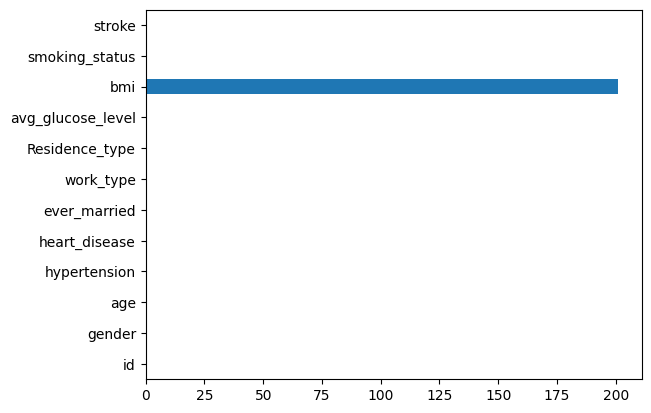

In [241]:
#Bar graph for the number ofnull values
df.isna().sum().plot.barh()

In [242]:
#Describing the data
df.describe()


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [243]:
#data type of all attributes and the number of NOT NULL values count is o
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


PreProcessing, Feature Selection and Feature Engineering

ID is useless for classification.

In [244]:
#id has no significant importance on prediction we can drop that column
df=df.drop(['id'],axis=1)
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

Gender attribute analysis  and Visualization

In [245]:
#check for outleirs in each column
df['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [246]:
#we can see that other count is 1 consider this a outlier
#we can remove the entire entity which has other gender
df=df[df['gender']!='Other']
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

<Axes: ylabel='gender'>

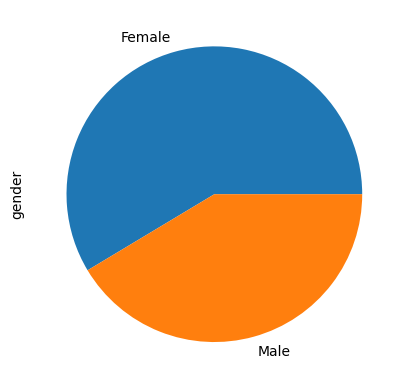

In [247]:
#visualise the gender column using pie chart
df['gender'].value_counts().plot(kind="pie")

<Axes: >

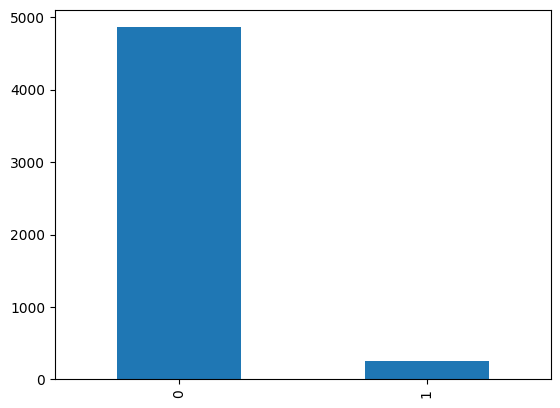

In [248]:
#visualise the gender column counts using bar graph
df['stroke'].value_counts().plot(kind="bar")

Target Feature and analysis.
0 indicates no stroke
1 indicates stroke

In [249]:
#counts in the stroke attribute
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [250]:
#percentage of instances who got stroke
print("percentage of people who got stroke is: ",end=" ")
print(df['stroke'].sum()/len(df)*100)

percentage of people who got stroke is:  4.873752201996477


<Axes: ylabel='stroke'>

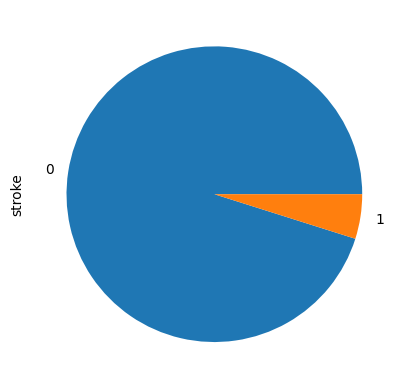

In [251]:
#visualise the stroke value counts
df['stroke'].value_counts().plot(kind="pie")

<Axes: >

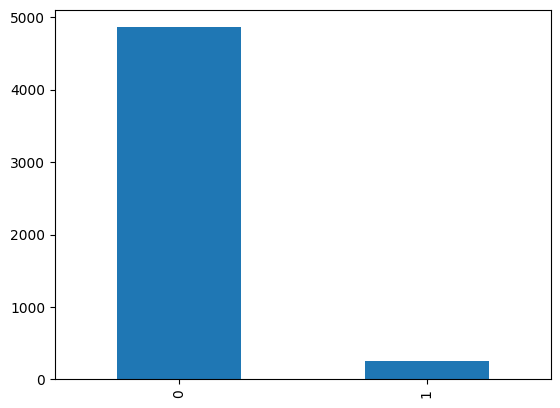

In [252]:
#using bar graph
df['stroke'].value_counts().plot(kind="bar")

In [253]:
print("The stroke possiblity 0 : ",end=" ")
print(df['stroke'].value_counts()[0])
print("Number of 1's in target feature: ",end=" ")
print(df['stroke'].value_counts()[1])

The stroke possiblity 0 :  4860
Number of 1's in target feature:  249


In [254]:
print("Percentage of people with stroke and without stroke: ",end=" ")
print((df['stroke'].value_counts()[1]/df['stroke'].value_counts()[0])*100)

Percentage of people with stroke and without stroke:  5.1234567901234565


Hyper - tension attribute analysis and visualization.

In [255]:
#attribute hyper tension analysis
#1 indicates the presence of hyper tension
#0 indicates the absence of hyper tension
df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

<Axes: ylabel='hypertension'>

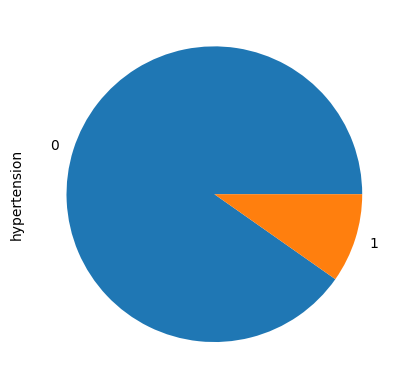

In [256]:
#visualiztion of feature using pie chart
df['hypertension'].value_counts().plot(kind="pie")

<Axes: >

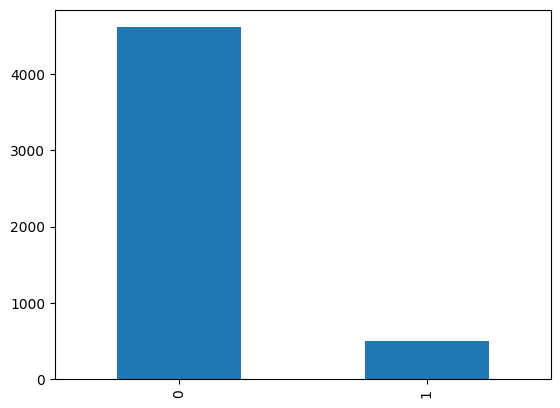

In [257]:
#using bar graph
df['hypertension'].value_counts().plot(kind="bar")

Work type attribute analysis and visualization

In [258]:
#feature work type analysis
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: ylabel='work_type'>

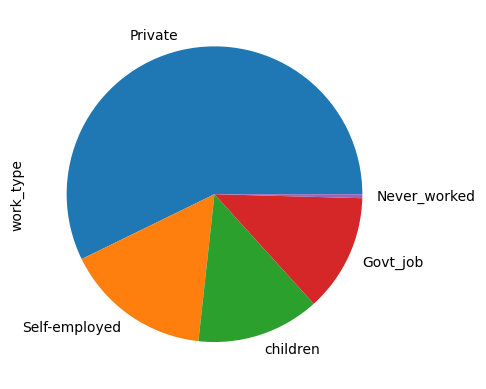

In [259]:
#visualize using pie chart
df['work_type'].value_counts().plot(kind="pie")

<Axes: >

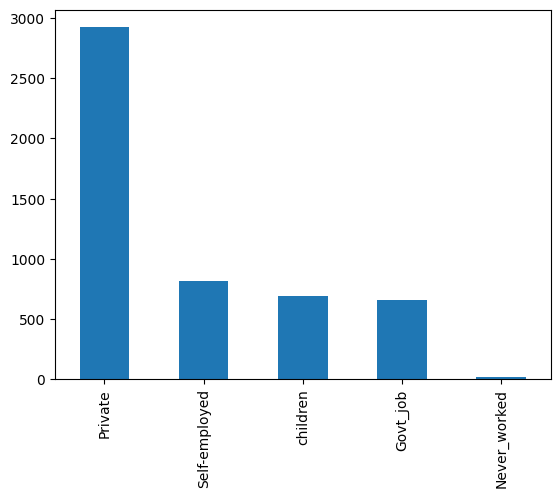

In [260]:
#Visualizing using bar graph
df['work_type'].value_counts().plot(kind="bar")

Smoking status analysis and visualization

In [261]:
#Smoking Status Attribute analysis
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<Axes: ylabel='smoking_status'>

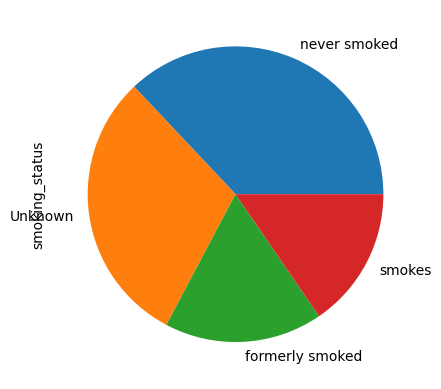

In [262]:
#graphical representation of value counts of smoking status attribute
df['smoking_status'].value_counts().plot(kind="pie")

<Axes: >

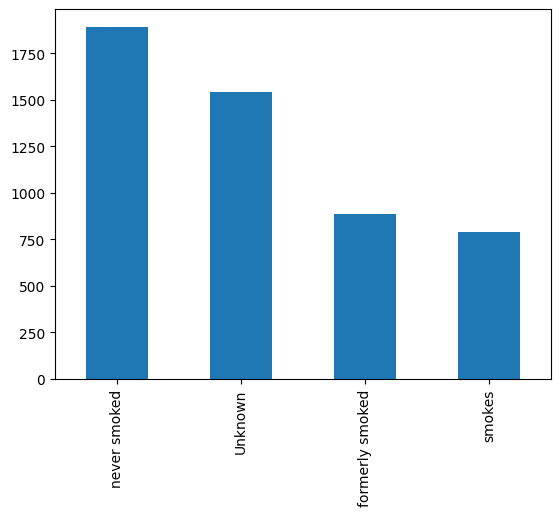

In [263]:
#visualize using bar graph
df['smoking_status'].value_counts().plot(kind="bar")

Residence type attribute analysis and visualization.

In [264]:
#residence type analysis
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

<Axes: ylabel='Residence_type'>

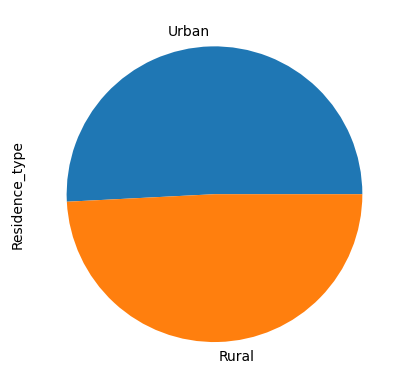

In [265]:
#visulaising the residence type using pie chart
df['Residence_type'].value_counts().plot(kind="pie")

<Axes: >

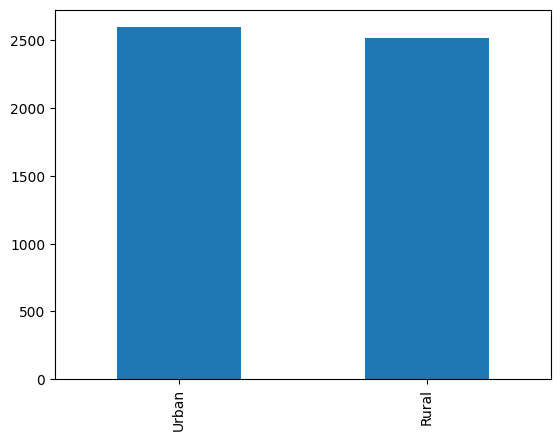

In [266]:
#visualizing the residence type attribute using bar graph
df['Residence_type'].value_counts().plot(kind="bar")

BMI feature analysis,Visualization and outliers finding

In [267]:
#BMI attribute analysis
#it has continous values.
#check for the null values
print("NUmber of null values are: ",end=" ")
df['bmi'].isnull().sum()

NUmber of null values are:  

201

<Axes: xlabel='bmi', ylabel='Count'>

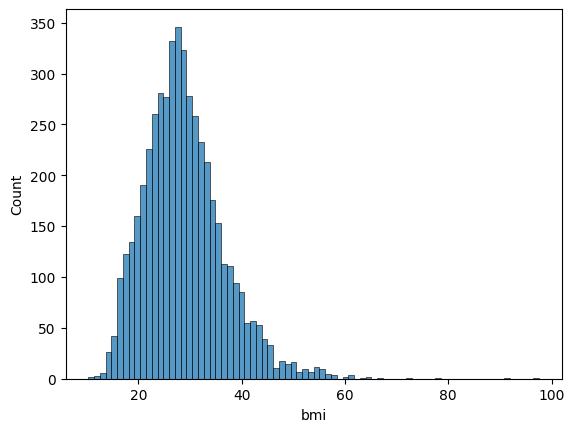

In [268]:
#visualize the bmi attribute using histogram
sns.histplot(data=df['bmi'])

In [269]:
#bmi is rightly skewed
print(df['bmi'].skew())

1.0550629490426457


<Axes: >

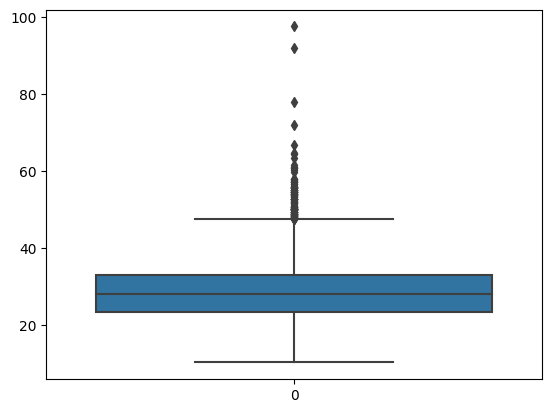

In [270]:
#visualise using box plot and find the ouliers.
sns.boxplot(data=df['bmi'])

In [271]:
#findiing the count of outlier based on those instances which are out of IQr
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
o=( df['bmi']<(q1-1.5*iqr))|(df['bmi']>(q3+1.5*iqr))
o

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5109, dtype: bool

In [272]:
#count
o.value_counts()

False    4999
True      110
Name: bmi, dtype: int64

In [273]:
#so according to +-1.5*IQR there are 110 outliers in the BMI attribute
#calculate the number of null values in the bmi attribute
print("number of null values is : ",df['bmi'].isna().sum())
print("Percentage of null values in the whole attribute is: ",(df['bmi'].isna().sum()/len(df['bmi']))*100)

number of null values is :  201
Percentage of null values in the whole attribute is:  3.9342337052260716


In [274]:
#Now check for the stroke status for the null values in bmi index
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA: ",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given: ",h)
print("Percentage of people with stroke of BMI null to overall attribute: ",g/h*100)

People who got stroke and their BMI is NA:  40
People who got stroke and their BMI is given:  249
Percentage of people with stroke of BMI null to overall attribute:  16.06425702811245


In [275]:
#Our main target function is stroke And the instances who got a stroke is in the minority - 249 Which is only 4.9 % of the instances
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())


Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [276]:
#Among the 201 bmi NULL values 40 values in them got stroke
#Thus we cant drop NULL values
#Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
#Hence we impute it with median values
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


<ipython-input-276-10e1d7547026>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi']=df['bmi'].fillna(df['bmi'].median())


Age attribute analysis, visualization and outliers analysis.

<Axes: xlabel='age', ylabel='Count'>

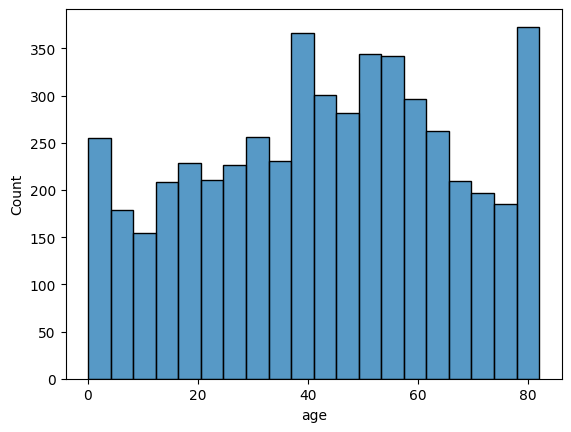

In [277]:
#AGE ANALYSIS
#Visualise the age attribute using histogram
sns.histplot(data=df['age'])

<Axes: >

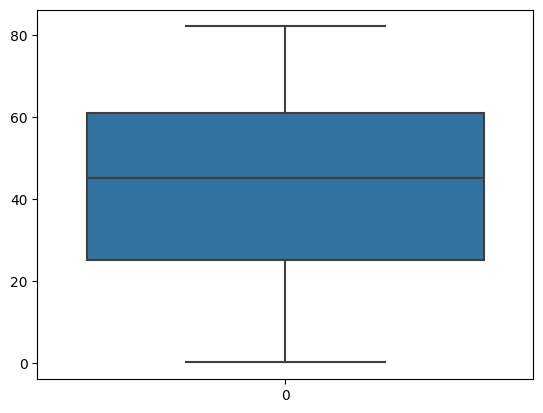

In [278]:
#visualize usiing box plot for checking of outliers
sns.boxplot(data=df['age'])

In [279]:
#from bos plot we can say that no outliers


Average Glucose level attibute analysis and visualization with outliers.

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

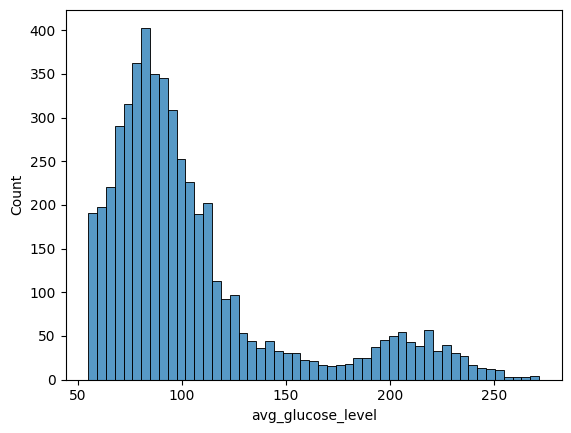

In [280]:
#average glucose level analysis
sns.histplot(data=df['avg_glucose_level'])

<Axes: >

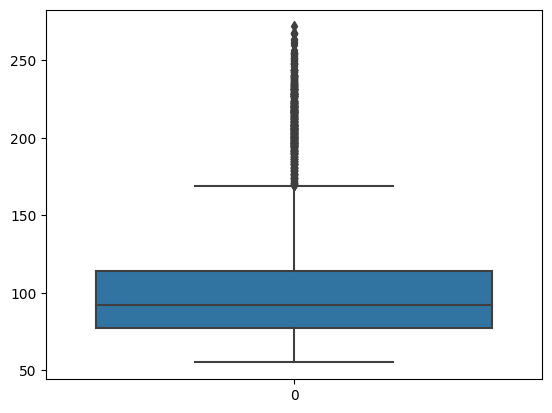

In [281]:
#visualise using bos plot
sns.boxplot(data=df['avg_glucose_level'])

In [282]:
#check for the skewness
if df['avg_glucose_level'].skew()>0:
  print("positive")
else:
  print("negative")
print(df['avg_glucose_level'].skew())

positive
1.5728153284961561


In [283]:
#there are outliers in  the attribute which can be seen easily in the bos plot easily.
#manully find the count of outliers
q11=df['avg_glucose_level'].quantile(0.25)
q33=df['avg_glucose_level'].quantile(0.75)
iqrr=q33-q11
ds=(df['avg_glucose_level']<(q11-1.5*iqrr)) | (df['avg_glucose_level']>(q33+1.5*iqrr))
ds.value_counts()

False    4482
True      627
Name: avg_glucose_level, dtype: int64

Heart Disease attribute analysis and visualization.

In [284]:
#heart disease analysis
df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

<Axes: ylabel='heart_disease'>

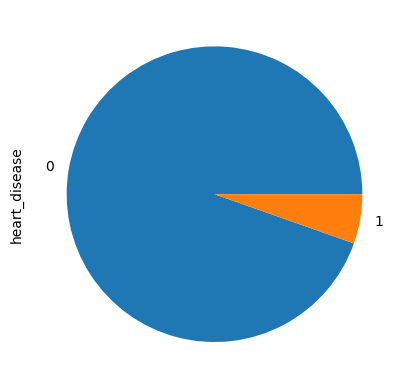

In [285]:
#visualize the heart disease attribute using pie chart
df['heart_disease'].value_counts().plot(kind="pie")

<Axes: >

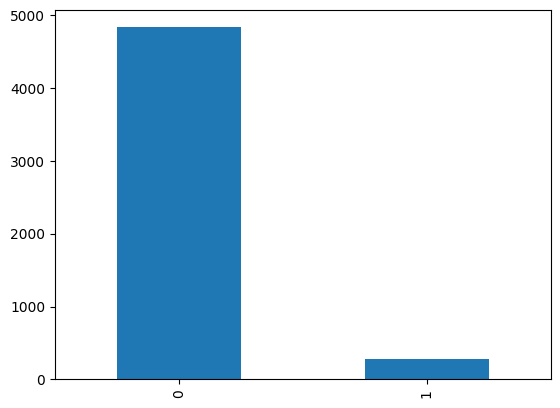

In [286]:
#visualizee using the bar graph
df['heart_disease'].value_counts().plot(kind="bar")

Ever married feature analysis and visualization.

In [287]:
#Ever married analysis
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

<Axes: ylabel='ever_married'>

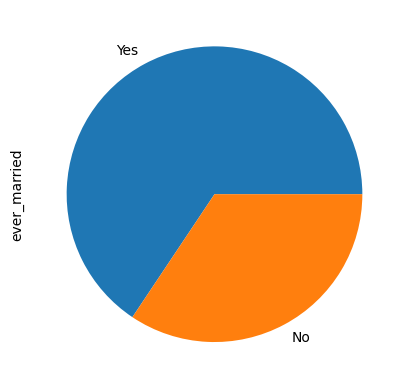

In [288]:
#visualize using pie chart
df['ever_married'].value_counts().plot(kind="pie")

<Axes: >

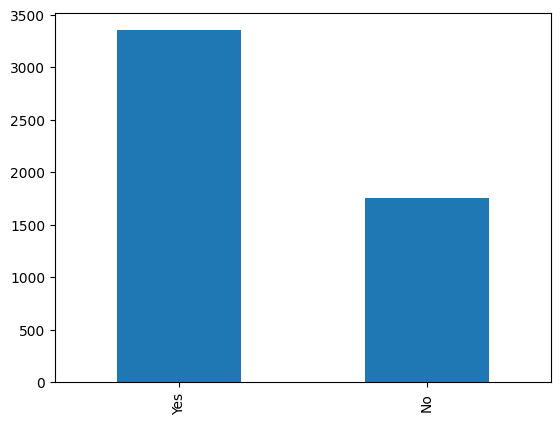

In [289]:
#visualize the attribute using bar graph
df['ever_married'].value_counts().plot(kind="bar")

Correaltion Between the attributes in the dataset to find any attributes are correlated.

<ipython-input-290-ab0dfb0aef2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


<Axes: >

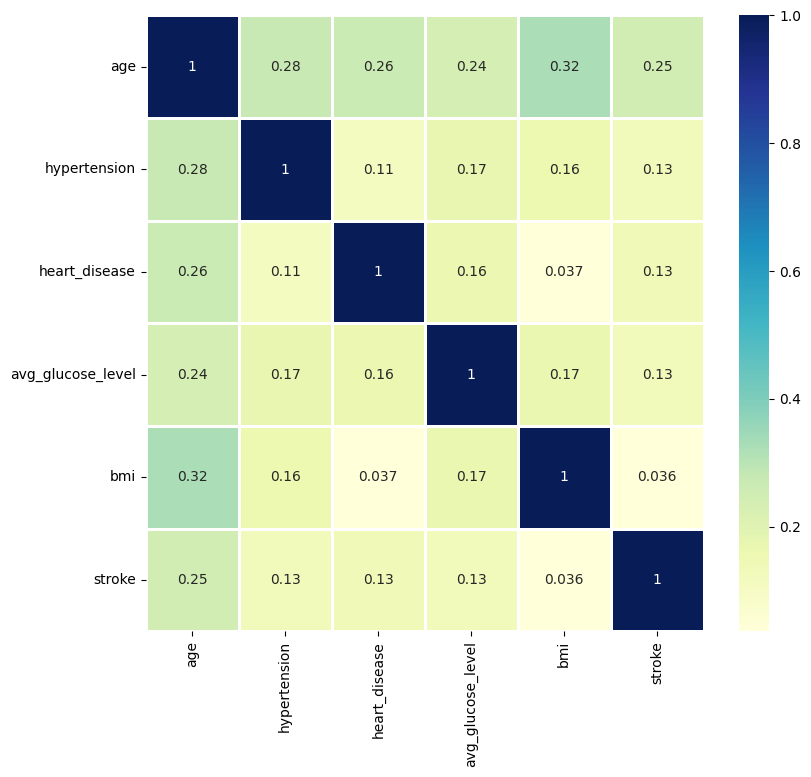

In [290]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

There is a weak correlation between the attributes as per the plotted heatmap

The highest correlation found was between age and bmi - 0.32

Rest all correlations were less than 0.32

We could not drw any statistical insight from heatmap

**Cross analysis - all the attribute compared with target attribute.**

<Axes: xlabel='stroke', ylabel='count'>

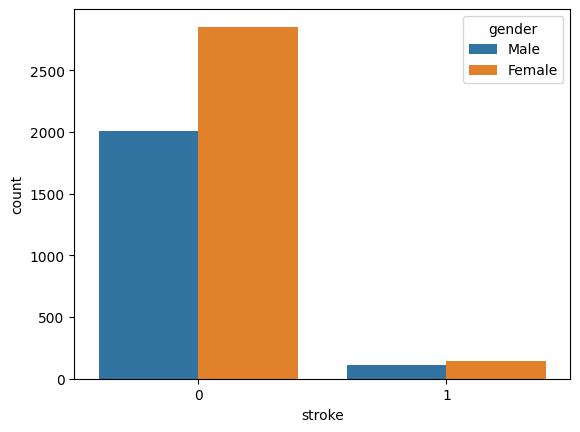

In [291]:
sns.countplot(x='stroke',hue='gender',data=df)

<Axes: xlabel='stroke', ylabel='count'>

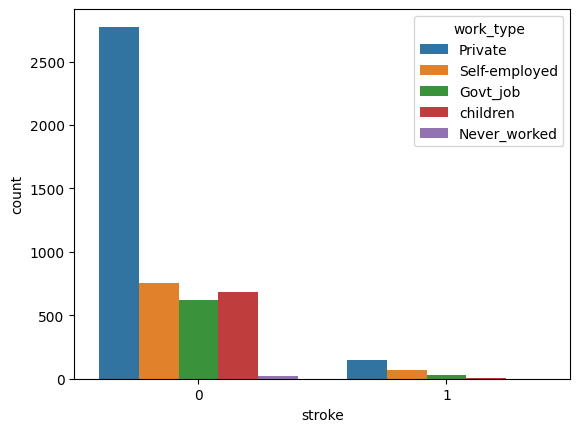

In [292]:
sns.countplot(x='stroke',hue='work_type',data=df)

Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

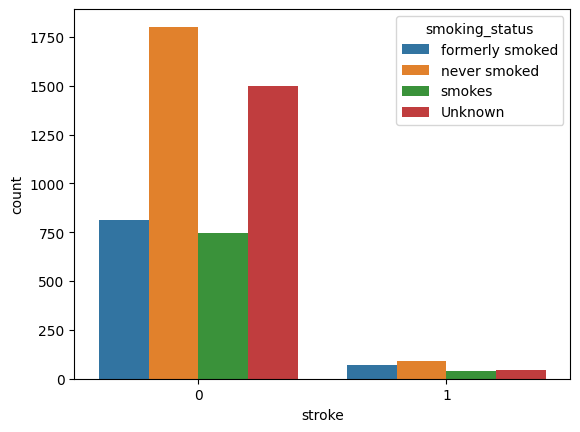

In [293]:
sns.countplot(x='stroke',hue='smoking_status',data=df)

Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

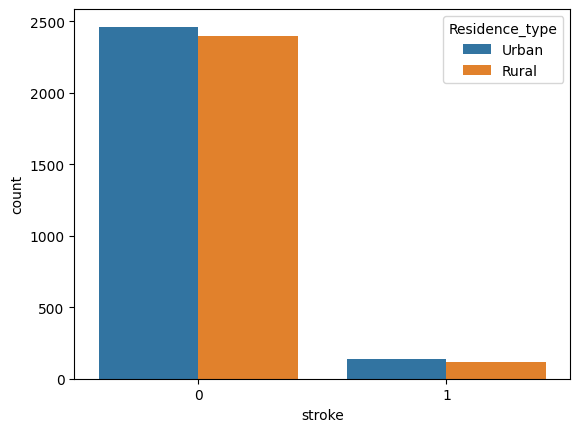

In [294]:
sns.countplot(x='stroke', hue='Residence_type', data=df)


Based on the analysis the people who live in Urban areas were reported with more strokes


<Axes: xlabel='stroke', ylabel='count'>

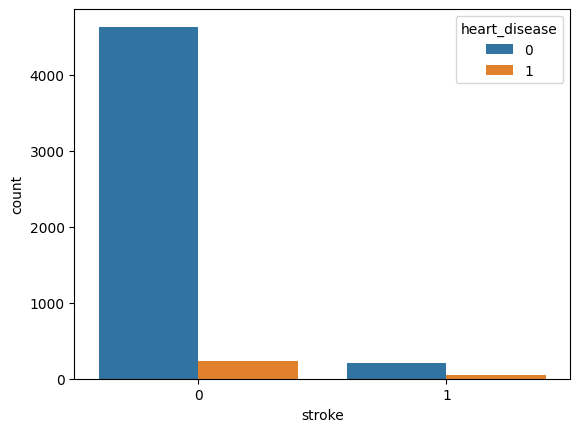

In [295]:
sns.countplot(x='stroke', hue='heart_disease', data=df)


This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.


<Axes: xlabel='stroke', ylabel='count'>

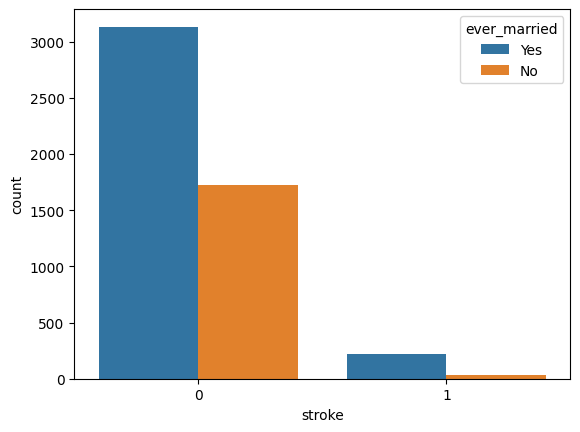

In [296]:
sns.countplot(x='stroke', hue='ever_married', data=df)


This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes".
This shows most of the Married people got Strokes compared to Unmarried people.

ONE HOT ENCODING
Creating Dummy variables for numeric-binary attributes.

In [297]:
# Converting numeric-binary value attributes to string
#take the testing input here and merge it with dataframe and doing one hot encoding

df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)

<ipython-input-297-dd833311983f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)


In [298]:
df.head()

age  avg_glucose_level   bmi  gender_Male  hypertension_1  \
0  67.0             228.69  36.6            1               0   
1  61.0             202.21  28.1            0               0   
2  80.0             105.92  32.5            1               0   
3  49.0             171.23  34.4            0               0   
4  79.0             174.12  24.0            0               1   

   heart_disease_1  ever_married_Yes  work_type_Never_worked  \
0                1                 1                       0   
1                0                 1                       0   
2                1                 1                       0   
3                0                 1                       0   
4                0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   
3                     1                               0   
4                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  stroke_1  
0                            0                      0         1  
1                            1                      0         1  
2                            1                      0         1  
3                            0                      1         1  
4                            1                      0         1

In [299]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [300]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])


Spliting the data into test and train

In [301]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split,learning_curve
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.4, random_state=42)

Model Selection and Training the model


DECISON TREE

In [315]:
# Import the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier

# Libraries for calculating performance metrics
from sklearn import metrics
import numpy as np
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
import pandas as pd

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train, y_train)

# Define a function to get user input
def get_user_input():
    # Get input from user
    print(df.columns)
    user_input = input("Please enter your data in the given format: ")

    # Convert user input to a list
    use = user_input.split()

    # Create a pandas series from the user input
    user_data = pd.Series(use, index=X_test.columns)

    # Append the user data to the test dataset
    gg= X_test.append(user_data, ignore_index=True)
    #print(y_test)


    # Return the last row of the test dataset
    print(gg.tail(1))
    return gg.tail(1)

# Get user data
u = get_user_input()

# Predict result using the user's data
y = clf.predict(u)
y_test.append(pd.Series(y),ignore_index=True)

# Print the prediction.
print("The predicted output is:", "STORKE" if y==1 else "NO STROKE")

y_pred=clf.predict(X_test)

Index(['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'hypertension_1',
       'heart_disease_1', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke_1'],
      dtype='object')
Please enter your data in the given format: 1 1 1 1 1 1 1 1 1 1  1 1 1 1 1
     age avg_glucose_level bmi gender_Male hypertension_1 heart_disease_1  \
3888   1                 1   1           1              1               1   

     ever_married_Yes work_type_Never_worked work_type_Private  \
3888                1                      1                 1   

     work_type_Self-employed work_type_children Residence_type_Urban  \
3888                       1                  1                    1   

     smoking_status_formerly smoked smoking_status_never smoked  \
3888                              1   

<ipython-input-315-e6f5539ce7a1>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gg= X_test.append(user_data, ignore_index=True)
<ipython-input-315-e6f5539ce7a1>:42: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test.append(pd.Series(y),ignore_index=True)


Visualising the tree

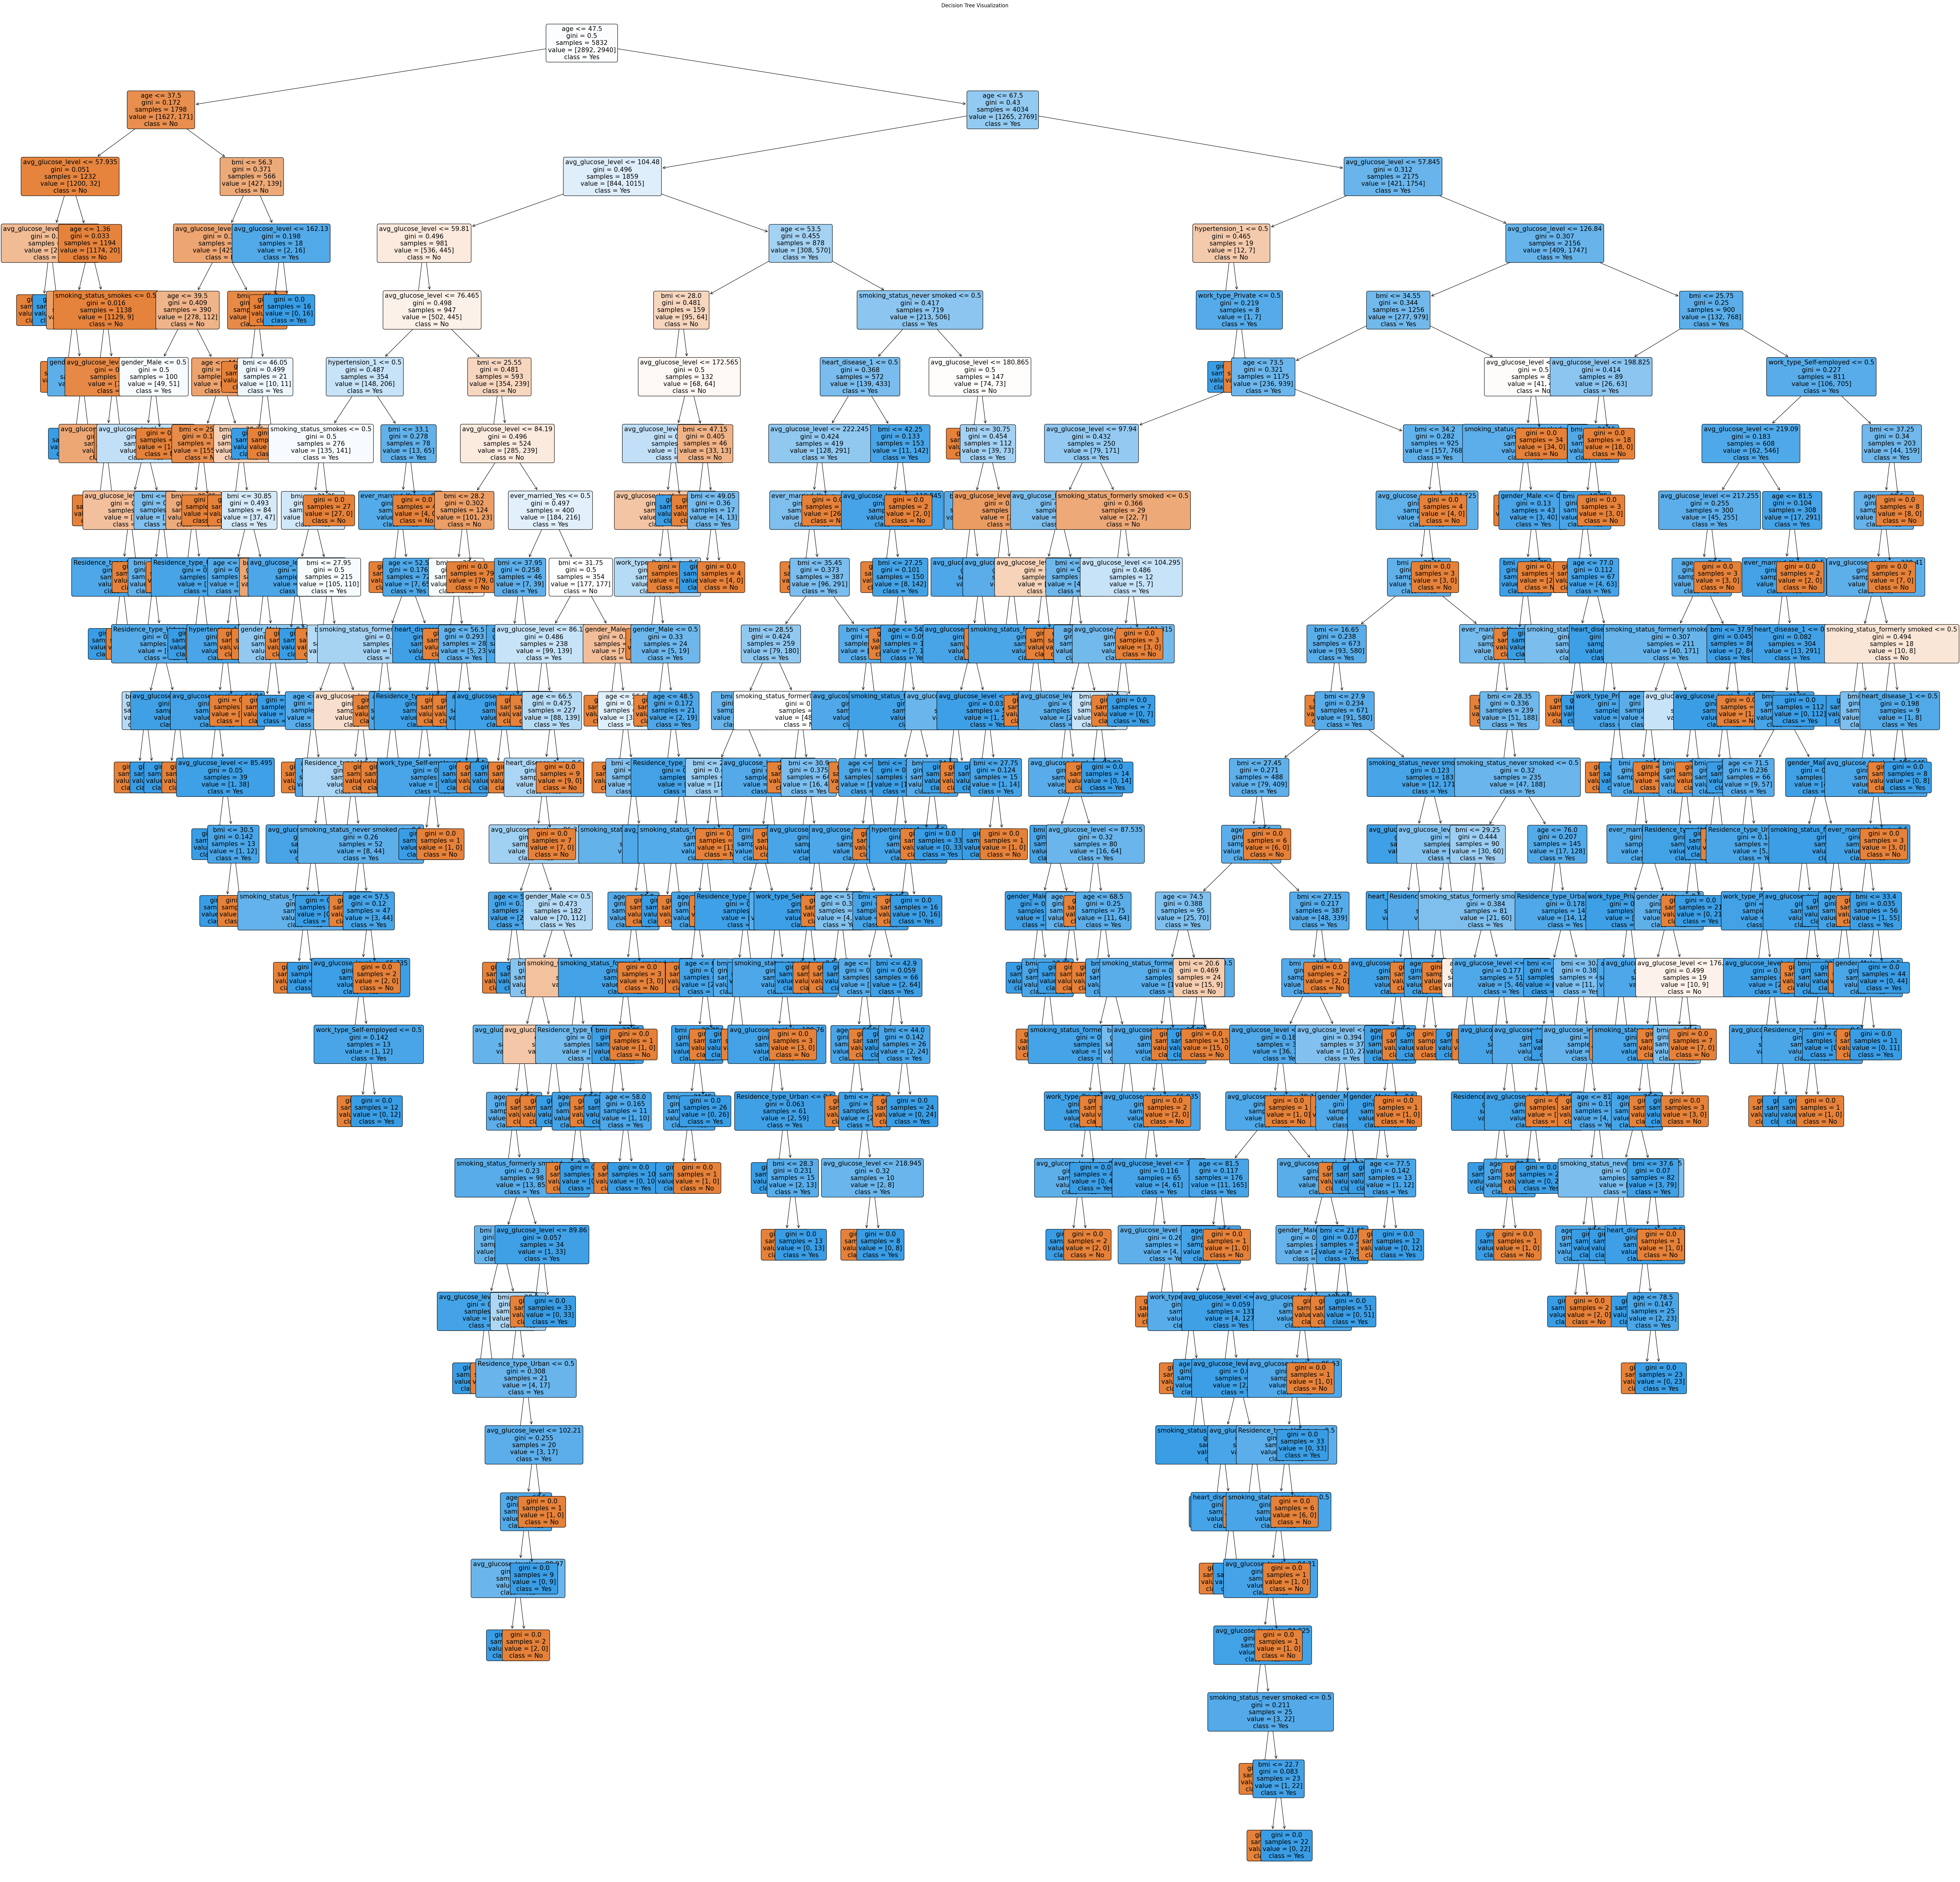

In [303]:
from sklearn import tree
plt.figure(figsize=(80,80))
tree.plot_tree(clf, feature_names=list(X_train.columns), filled=True, class_names=['No', 'Yes'], rounded=True,fontsize=15)

plt.title("Decision Tree Visualization")
plt.show()


Metrics for the Decision Tree


In [316]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.97
Precision: 0.94
Recall: 1.00
F1 Score: 0.97
ROC AUC Score: 0.97
Confusion Matrix: 
[[1851  117]
 [   0 1920]]


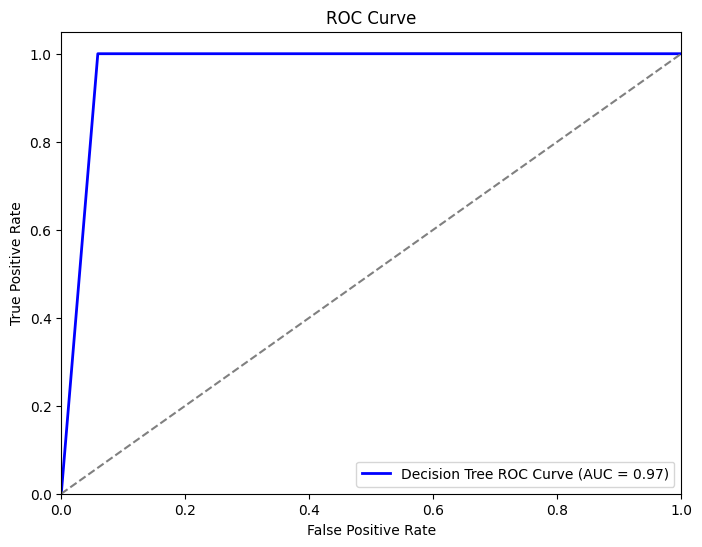

In [305]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred)
# Calculate the ROC AUC score for the Decision Tree model
roc_auc_dt = roc_auc_score(y_test, y_pred)

# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='b', lw=2, label=f'Decision Tree ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Error and loss Curve

RANDOM FOREST


In [313]:
from sklearn.ensemble import RandomForestClassifier

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 10)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Define a function to get user input
def get_user_input():
    # Get input from user
    print(df.columns)
    user_input = input("Please enter your data in the given format: ")

    # Convert user input to a list
    use = user_input.split()

    # Create a pandas series from the user input
    user_data = pd.Series(use, index=X_test.columns)

    # Append the user data to the test dataset
    gg= X_test.append(user_data, ignore_index=True)

    # Return the last row of the test dataset
    print(gg.tail(1))
    return gg.tail(1)

# Get user data
u = get_user_input()

# Predict result using the user's data
y = clf.predict(u)

# Print the prediction.
print("The predicted output is:", y)

Index(['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'hypertension_1',
       'heart_disease_1', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke_1'],
      dtype='object')
Please enter your data in the given format: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
     age avg_glucose_level bmi gender_Male hypertension_1 heart_disease_1  \
3888   1                 1   1           1              1               1   

     ever_married_Yes work_type_Never_worked work_type_Private  \
3888                1                      1                 1   

     work_type_Self-employed work_type_children Residence_type_Urban  \
3888                       1                  1                    1   

     smoking_status_formerly smoked smoking_status_never smoked  \
3888                              1    

<ipython-input-313-3c563695880b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gg= X_test.append(user_data, ignore_index=True)


Visualising the Random Forests

In [ ]:
from sklearn import tree
for i, t in enumerate(rf_clf.estimators_):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(t, filled=True, feature_names=list(X_train.columns), class_names=['No', 'Yes'], rounded=True)
    plt.title(f"Decision Tree Visualization (Tree {i+1})")
    plt.show()


Metrics for the Random Forest.


In [317]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(confusion_matrix(y_test,y_pred_rf))

Accuracy: 0.99
Precision: 0.97
Recall: 1.00
F1 Score: 0.99
ROC AUC Score: 1.00
[[1913   55]
 [   0 1920]]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Error Curve and Loss Curve

In [318]:
# train_sizes, train_scores, test_scores = learning_curve(rf_clf, X, y, cv=5, scoring='accuracy')
# train_scores_mean = 1 - np.mean(train_scores, axis=1)
# test_scores_mean = 1 - np.mean(test_scores, axis=1)

# # Loss Curve
# train_sizes, train_loss, test_loss = learning_curve(rf_clf, X, y, cv=5, scoring='neg_log_loss')
# train_loss_mean = -np.mean(train_loss, axis=1)
# test_loss_mean = -np.mean(test_loss, axis=1)

# # Plot Error Curve
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Error")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Error")
# plt.title("Random Forest Error Curve")
# plt.xlabel("Training examples")
# plt.ylabel("Error")
# plt.legend(loc="best")

# # Plot Loss Curve
# plt.subplot(1, 2, 2)
# plt.plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training Loss")
# plt.plot(train_sizes, test_loss_mean, 'o-', color="g", label="Validation Loss")
# plt.title("Random Forest Loss Curve")
# plt.xlabel("Training examples")
# plt.ylabel("Log Loss")
# plt.legend(loc="best")

# plt.show()


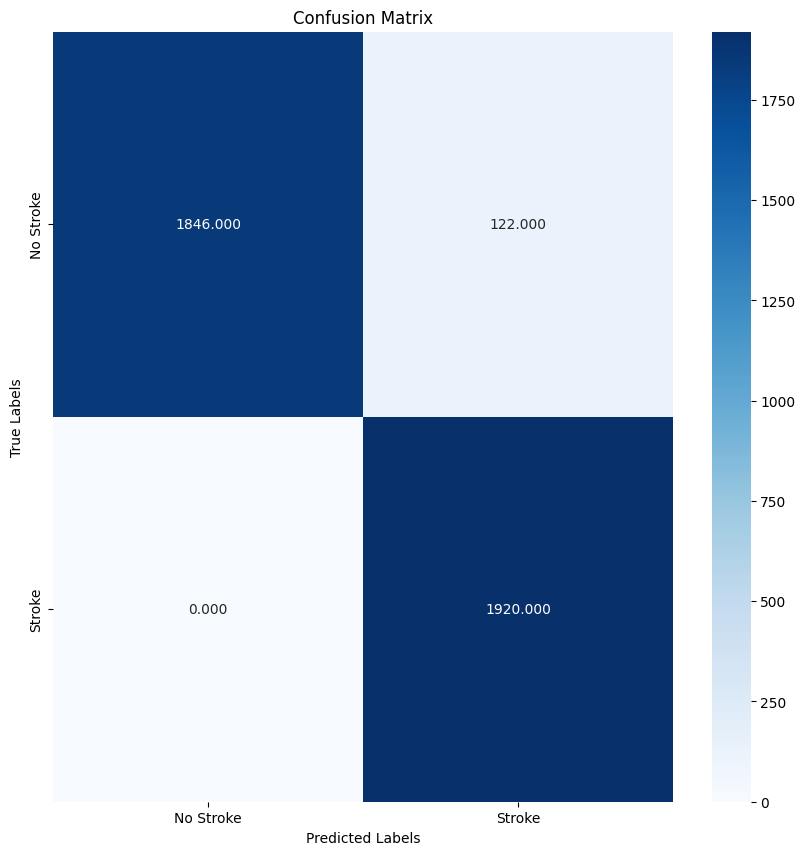

Accuracy: 0.9686213991769548
Precision: 0.940254652301665
Recall: 1.0
F1 Score: 0.9692074709742554
ROC AUC Score: 0.9690040650406504


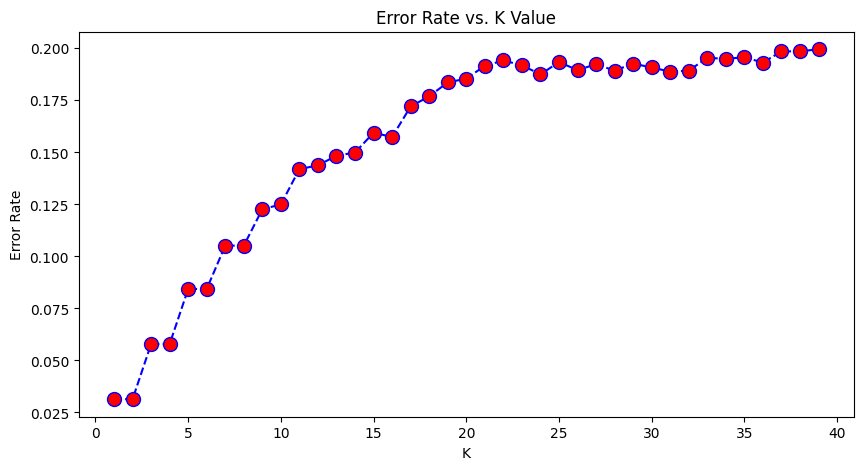

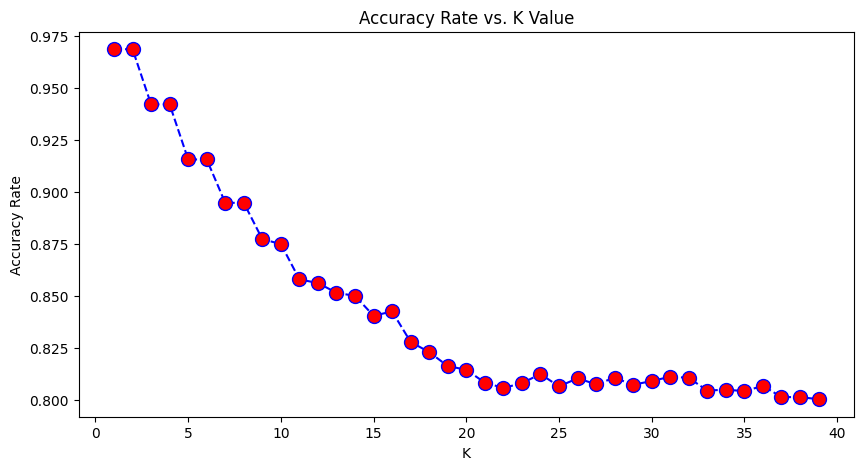

In [319]:
#importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create the classifier object
knn = KNeighborsClassifier(n_neighbors = 2)

# Training the classifier
knn.fit(X_train,y_train)

#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(cm, annot=True, fmt=".3f", ax=ax, cmap=cmap)
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')
  ax.set_xticklabels(classes)
  ax.set_yticklabels(classes)
  plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn, classes=['No Stroke', 'Stroke'], cmap=plt.cm.Blues)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('F1 Score:', f1_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

error_rate = []
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    accuracy_rate.append(accuracy_score(y_test, pred_i))
# Plotting the error and loss curve
plt.figure(figsize=(10,5))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Plotting the KNN graph
plt.figure(figsize=(10,5))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()



Epoch 1/50
183/183 [==============================] - 2s 7ms/step - loss: 2.0875 - accuracy: 0.6022 - val_loss: 0.5477 - val_accuracy: 0.7305
Epoch 2/50
183/183 [==============================] - 1s 5ms/step - loss: 0.9632 - accuracy: 0.6514 - val_loss: 0.5925 - val_accuracy: 0.6867
Epoch 3/50
183/183 [==============================] - 1s 5ms/step - loss: 0.7470 - accuracy: 0.6730 - val_loss: 0.5395 - val_accuracy: 0.7307
Epoch 4/50
183/183 [==============================] - 1s 3ms/step - loss: 0.6616 - accuracy: 0.6927 - val_loss: 0.5221 - val_accuracy: 0.7446
Epoch 5/50
183/183 [==============================] - 1s 8ms/step - loss: 0.5980 - accuracy: 0.7025 - val_loss: 0.5190 - val_accuracy: 0.7415
Epoch 6/50
183/183 [==============================] - 1s 4ms/step - loss: 0.5711 - accuracy: 0.7198 - val_loss: 0.5227 - val_accuracy: 0.7485
Epoch 7/50
183/183 [==============================] - 1s 3ms/step - loss: 0.5573 - accuracy: 0.7233 - val_loss: 0.5151 - val_accuracy: 0.7485
Epoch 

KeyboardInterrupt: ignored

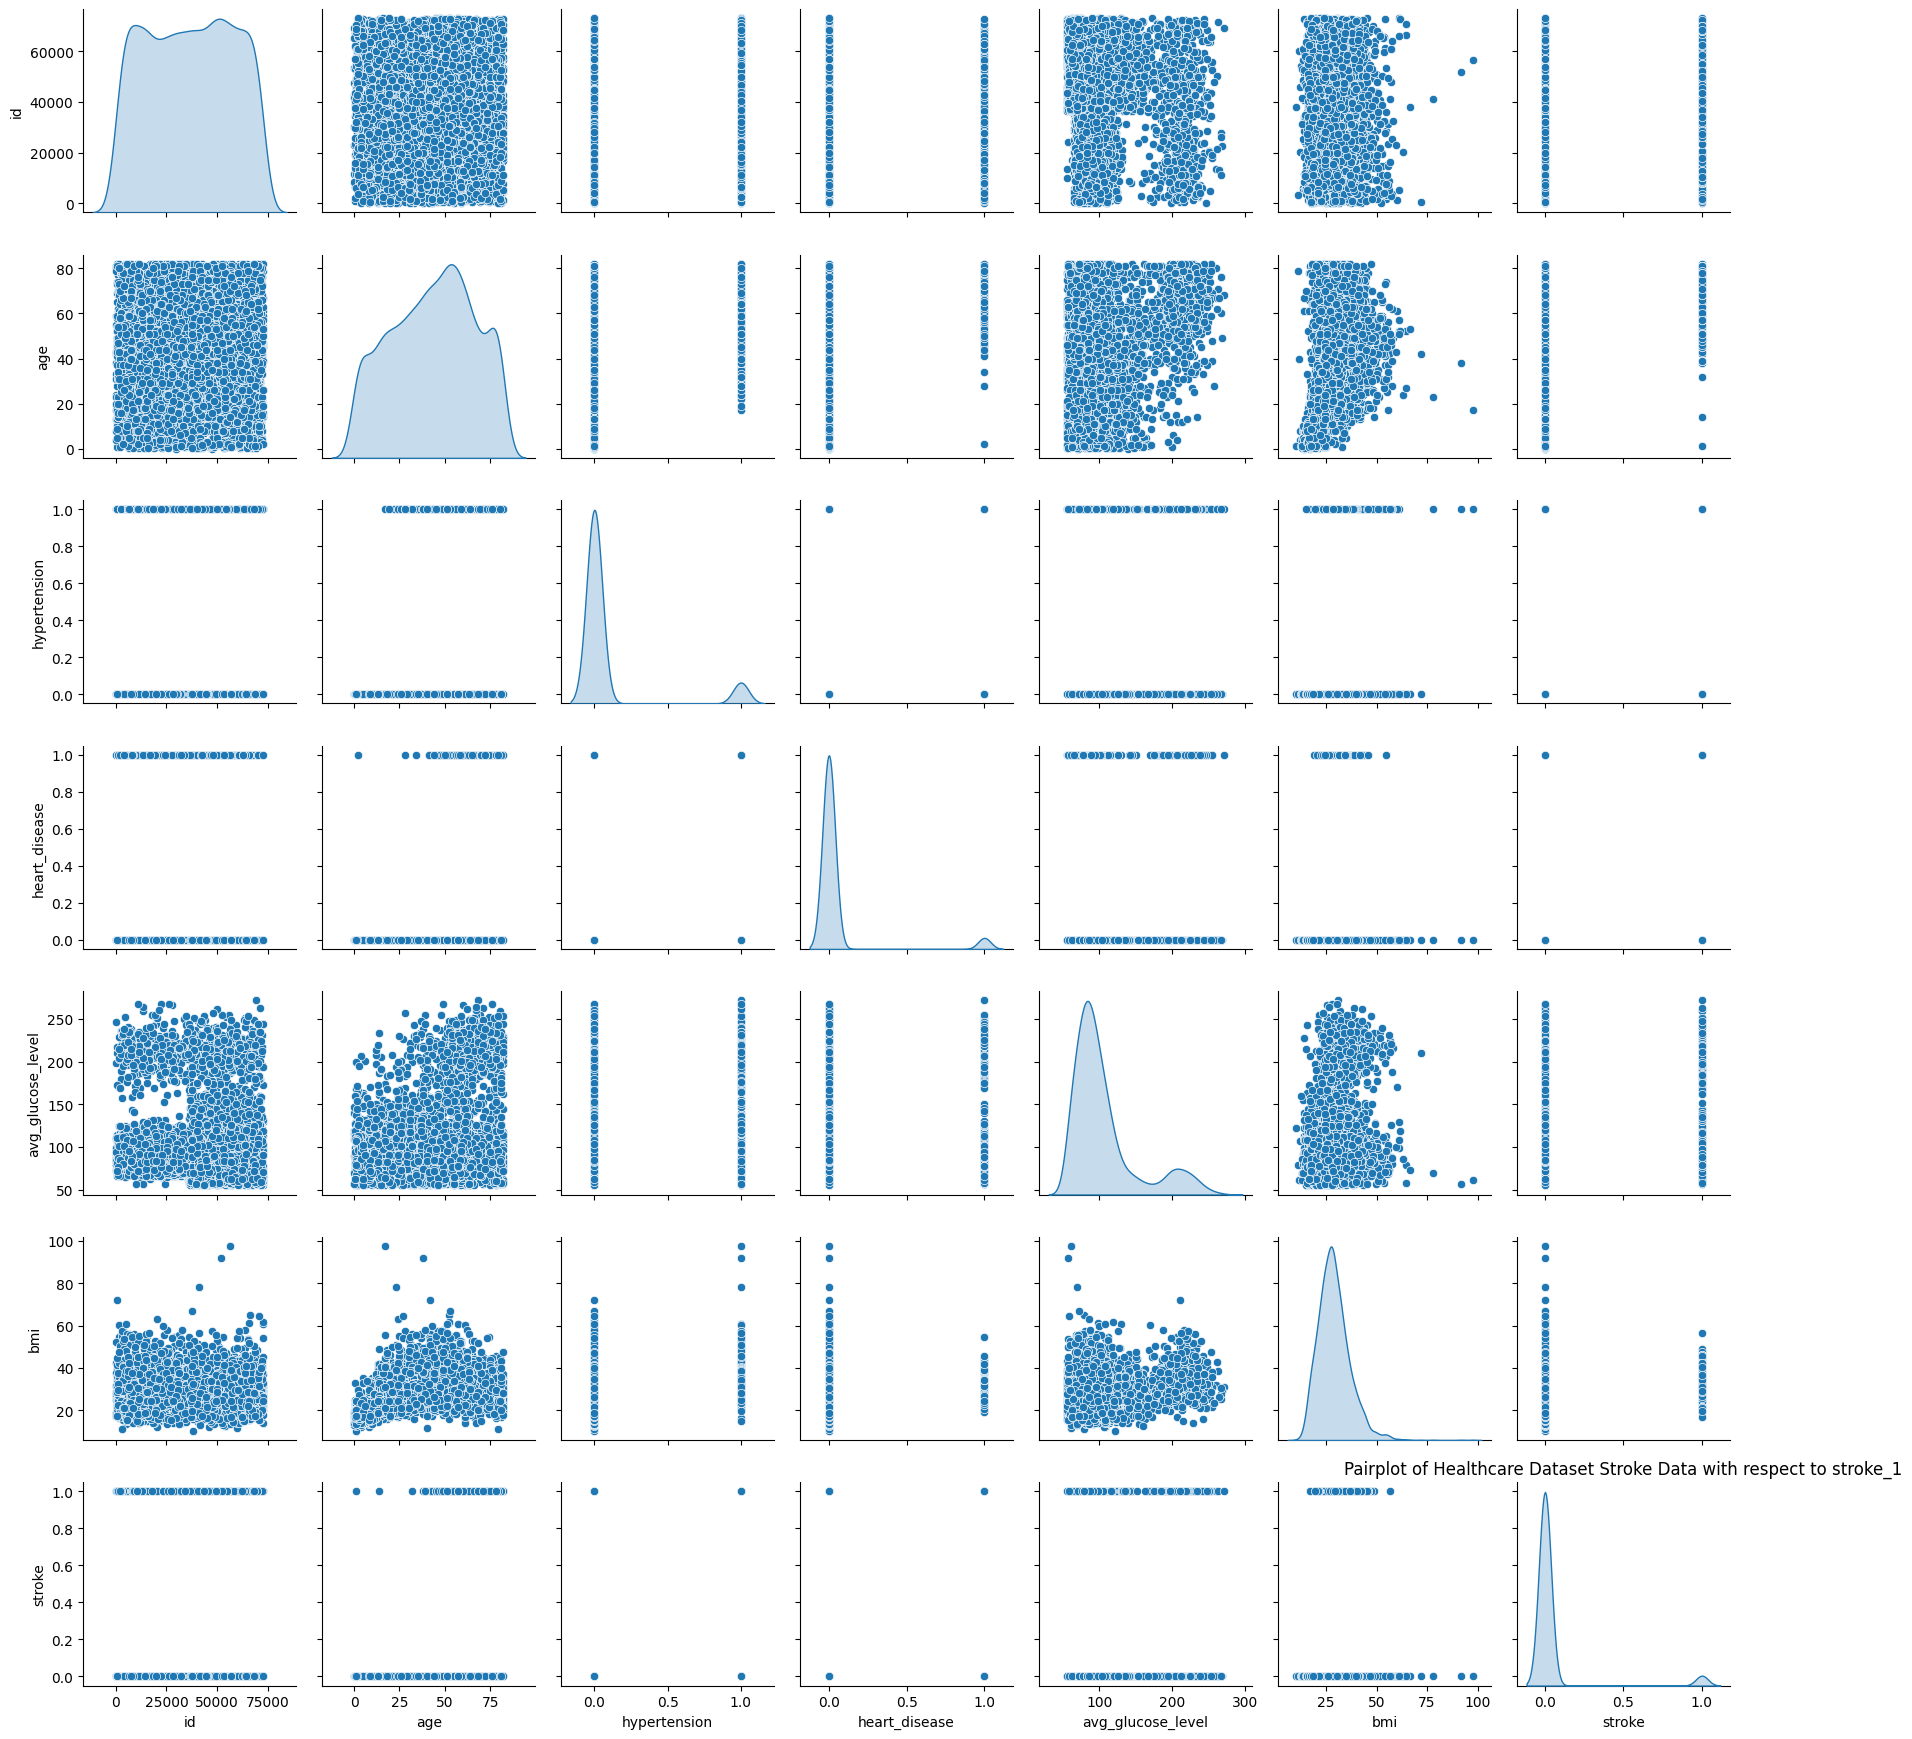

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Create the pair plot
sns.pairplot(data, diag_kind="kde")
plt.title("Pairplot of Healthcare Dataset Stroke Data with respect to stroke_1")

# Adjust the layout
plt.tight_layout()

# Save the plot
plt.savefig("pairplot.png")
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],), name='input_layer'),
    layers.Dense(128, activation='LeakyReLU', name='dense_1'),
    layers.Dropout(0.3, name='dropout_1'),
    layers.Dense(64, activation='LeakyReLU', name='dense_2'),
    layers.Dropout(0.3, name='dropout_2'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

keras.utils.plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

# Get the input from the user
user_input = {
    'age': float(input('Enter age: ')),
    'avg_glucose_level': float(input('Enter average glucose level: ')),
    'bmi': float(input('Enter bmi: ')),
    'gender_Male': int(input('Enter gender (1 for Male, 0 for Female): ')),
    'hypertension_1': int(input('Enter hypertension (1 for Yes, 0 for No): ')),
    'heart_disease_1': int(input('Enter heart disease (1 for Yes, 0 for No): ')),
    'ever_married_Yes': int(input('Enter ever married (1 for Yes, 0 for No): ')),
    'work_type_Never_worked': int(input('Enter work type Never worked (1 for Yes, 0 for No): ')),
    'work_type_Private': int(input('Enter work type Private (1 for Yes, 0 for No): ')),
    'work_type_Self-employed': int(input('Enter work type Self-employed (1 for Yes, 0 for No): ')),
    'work_type_children': int(input('Enter work type children (1 for Yes, 0 for No): ')),
    'Residence_type_Urban': int(input('Enter residence type Urban (1 for Yes, 0 for No): ')),
    'smoking_status_formerly smoked': int(input('Enter smoking status formerly smoked (1 for Yes, 0 for No): ')),
    'smoking_status_never smoked': int(input('Enter smoking status never smoked (1 for Yes, 0 for No): ')),
    'smoking_status_smokes': int(input('Enter smoking status smokes (1 for Yes, 0 for No): ')),
}

# Convert the user input into a pandas DataFrame
user_input_df = pd.DataFrame([user_input])

# Use the trained model to predict the output
user_pred_ann = model.predict(user_input_df)

if(user_pred_ann > 0.5):
  print('Predicted Stroke:', 1)
else:
  print('Predicted Stroke:', 0)


In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score,confusion_matrix

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Plot the confusion matrix big and with colors
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
  cm = confusion_matrix(y_true, y_pred)

  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(cm, annot=True, fmt=".3f", ax=ax, cmap=cmap)
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')
  ax.set_xticklabels(classes)
  ax.set_yticklabels(classes)
  plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['No Stroke', 'Stroke'], cmap=plt.cm.Blues)

# Print the confusion matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



In [ ]:
y_prob = model.predict(X_test)

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Train the model and obtain the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Extract training and validation loss and accuracy from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create the error curve (1 - accuracy)
train_error = [1 - acc for acc in train_accuracy]
val_error = [1 - acc for acc in val_accuracy]

# Plot Error Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_error, 'o-', color="r", label="Training Error")
plt.plot(val_error, 'o-', color="g", label="Validation Error")
plt.title("Neural Network Error Curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(loc="best")

# Plot Loss Curve
plt.subplot(1, 2, 2)
plt.plot(train_loss, 'o-', color="r", label="Training Loss")
plt.plot(val_loss, 'o-', color="g", label="Validation Loss")
plt.title("Neural Network Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")

plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create and train the logistic regression model
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions
y_pred_lr = classifier.predict(X_test)
loss = classifier.score(X_test, y_test)

# Plot the logistic regression graph
plt.figure()
plt.plot(X_test, y_pred_lr, 'o-', color='b')
plt.xlabel('Feature')
plt.ylabel('Predicted probability')
plt.title('Logistic regression graph')
plt.show()

print("Loss:", loss)

# Get the input from the user
user_input = {
    'age': float(input('Enter age: ')),
    'avg_glucose_level': float(input('Enter average glucose level: ')),
    'bmi': float(input('Enter bmi: ')),
    'gender_Male': int(input('Enter gender (1 for Male, 0 for Female): ')),
    'hypertension_1': int(input('Enter hypertension (1 for Yes, 0 for No): ')),
    'heart_disease_1': int(input('Enter heart disease (1 for Yes, 0 for No): ')),
    'ever_married_Yes': int(input('Enter ever married (1 for Yes, 0 for No): ')),
    'work_type_Never_worked': int(input('Enter work type Never worked (1 for Yes, 0 for No): ')),
    'work_type_Private': int(input('Enter work type Private (1 for Yes, 0 for No): ')),
    'work_type_Self-employed': int(input('Enter work type Self-employed (1 for Yes, 0 for No): ')),
    'work_type_children': int(input('Enter work type children (1 for Yes, 0 for No): ')),
    'Residence_type_Urban': int(input('Enter residence type Urban (1 for Yes, 0 for No): ')),
    'smoking_status_formerly smoked': int(input('Enter smoking status formerly smoked (1 for Yes, 0 for No): ')),
    'smoking_status_never smoked': int(input('Enter smoking status never smoked (1 for Yes, 0 for No): ')),
    'smoking_status_smokes': int(input('Enter smoking status smokes (1 for Yes, 0 for No): ')),
}

# Convert the user input into a pandas DataFrame
user_input_df = pd.DataFrame([user_input])

# Use the trained logistic regression model to predict the output
user_pred_ann = model.predict(user_input_df)

# Threshold the prediction at 0.5
user_pred = user_pred_ann > 0.5
if(user_pred == True):
  print('Predicted stroke: 1')
else:
  print('Predicted stroke: 0')



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Calculate the other evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1_score = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)

# Print the evaluation metrics
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
  cm = confusion_matrix(y_true, y_pred_lr)

  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(cm, annot=True, fmt=".3f", ax=ax, cmap=cmap)
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')
  ax.set_xticklabels(classes)
  ax.set_yticklabels(classes)
  plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_lr, classes=['No Stroke', 'Stroke'], cmap=plt.cm.Blues)

# Print the confusion matrix
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)
print("ROC AUC:", roc_auc)



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predictions from the logistic regression model
y_pred_lr = classifier.predict(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()




In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
data = df
features = [
'age',
'avg_glucose_level',
'bmi',
'gender_Male',
'hypertension_1',
'heart_disease_1',
'ever_married_Yes',
'work_type_Never_worked',
'work_type_Private',
'work_type_Self-employed',
'work_type_children',
'Residence_type_Urban',
'smoking_status_formerly smoked',
'smoking_status_never smoked',
'smoking_status_smokes'
]
target = 'stroke_1'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb_clf = GaussianNB(var_smoothing=1e-9)
gnb_clf.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb_clf, X, y, cv=5)
print(f"Gaussian Naive Bayes Cross-Validation Accuracy: {gnb_scores.mean()}")
user_input = input("Enter the values for the features (separated by spaces): ").split()
input_df = pd.DataFrame([user_input], columns=features)
gnb_predictions = gnb_clf.predict(input_df)
if gnb_predictions[0] == 1:
  print("The model predicts that the person may have a stroke.")
else:
  print("The model predicts that the person may not have a stroke.")
gnb_y_pred = gnb_clf.predict(X_test)


In [ ]:
# Calculate the evaluation metrics for the Gaussian Naive Bayes model
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
gnb_precision = precision_score(y_test, gnb_y_pred)
gnb_recall = recall_score(y_test, gnb_y_pred)
gnb_f1 = f1_score(y_test, gnb_y_pred)
gnb_roc_auc = roc_auc_score(y_test, gnb_clf.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("\nGaussian Naive Bayes Evaluation Metrics:")
print(f"Accuracy: {gnb_accuracy:.2f}")
print(f"Precision: {gnb_precision:.2f}")
print(f"Recall: {gnb_recall:.2f}")
print(f"F1 Score: {gnb_f1:.2f}")
print(f"ROC AUC Score: {gnb_roc_auc:.2f}")


In [ ]:
# Calculate the evaluation metrics for the Gaussian Naive Bayes model
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
gnb_precision = precision_score(y_test, gnb_y_pred)
gnb_recall = recall_score(y_test, gnb_y_pred)
gnb_f1 = f1_score(y_test, gnb_y_pred)
gnb_roc_auc = roc_auc_score(y_test, gnb_clf.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("\nGaussian Naive Bayes Evaluation Metrics:")
print(f"Accuracy: {gnb_accuracy:.2f}")
print(f"Precision: {gnb_precision:.2f}")
print(f"Recall: {gnb_recall:.2f}")
print(f"F1 Score: {gnb_f1:.2f}")
print(f"ROC AUC Score: {gnb_roc_auc:.2f}")


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_y_pred)
roc_auc_gnb = roc_auc_score(y_test, gnb_y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='b', lw=2, label='Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data=df
# Define the features and target variable
features = [
'age',
'avg_glucose_level',
'bmi',
'gender_Male',
'hypertension_1',
'heart_disease_1',
'ever_married_Yes',
'work_type_Never_worked',
'work_type_Private',
'work_type_Self-employed',
'work_type_children',
'Residence_type_Urban',
'smoking_status_formerly smoked',
'smoking_status_never smoked',
'smoking_status_smokes'
]
target = 'stroke_1'
X = data[features]
y = data[target]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Gaussian Naive Bayes classifier
gnb_clf = GaussianNB()
# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(gnb_clf, X_train, y_train, cv=5, scoring='accuracy')
train_scores_mean = 1 - np.mean(train_scores, axis=1)
test_scores_mean = 1 - np.mean(test_scores, axis=1)
# Calculate the loss curve
train_sizes, train_loss, test_loss = learning_curve(gnb_clf, X_train, y_train, cv=5, scoring='neg_log_loss')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)
# Plot the error and loss curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Error")
plt.title("Gaussian Naive Bayes Error Curve")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.legend(loc="best")
# Plot the loss curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training Loss")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g", label="Validation Loss")
plt.title("Gaussian Naive Bayes Loss Curve")
plt.xlabel("Training examples")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()


In [ ]:
import pandas as pd

# Load the stroke data into a DataFrame
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
available_columns = data.columns.tolist()
chosen_column = input("Enter the column name (gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status): ")
chosen_value = input(f"Enter the value for {chosen_column}: ")
if chosen_column not in available_columns:
    print(f"Invalid column name '{chosen_column}'. Please enter one of the following: ")
    for column in available_columns:
        print(f"- {column}")
    exit()
try:
    chosen_value = float(chosen_value)
except ValueError:
    if chosen_column in ['gender', 'work_type', 'Residence_type', 'smoking_status']:
        # Check if the input value is a valid categorical value
        if chosen_value not in data[chosen_column].unique():
            print(f"Invalid value '{chosen_value}' for column '{chosen_column}'.")
            exit()
    else:
        print(f"Invalid value '{chosen_value}' for column '{chosen_column}'.")
        exit()
if chosen_value in data[chosen_column].unique():
    class_prior_probabilities = data['stroke'].value_counts(normalize=True)
    frequency_table = data.groupby([chosen_column, 'stroke']).size().unstack().fillna(0)
    posterior_probabilities = frequency_table.apply(lambda x: x / x.sum(), axis=1)
    predicted_probabilities = {}
    for outcome in data['stroke'].unique():
        probability = class_prior_probabilities[outcome] * posterior_probabilities.loc[chosen_value, outcome]
        predicted_probabilities[outcome] = probability
    map_estimate = max(predicted_probabilities, key=predicted_probabilities.get)
    sorted_predictions = {k: v for k, v in sorted(predicted_probabilities.items(), key=lambda item: item[1], reverse=True)}

    print("Class Prior Probabilities:")
    print(class_prior_probabilities)
    print("\n")
    print(f"Frequency Table for {chosen_column} and stroke:")
    print(frequency_table)
    print("\n")
    print("Posterior Probabilities:")
    print(posterior_probabilities)
    print("\n")
    print(f"Predicted Probabilities for stroke ({chosen_column}='{chosen_value}'):")
    print(predicted_probabilities)
    print("\n")
    print(f"MAP Estimate for stroke: {map_estimate}")
    print("\n")
    print(f"Sorted Predictions:")
    for k, v in sorted_predictions.items():
        print(f"{k}: {v}")
else:
    print(f"The value '{chosen_value}' does not exist in the '{chosen_column}' column.")
